# 15 - Validação do melhor modelo

O melhor modelo encontrado foi a Random Forest com o score de 0.78. O modelo possui os seguintes parâmetros:

```json
{
    'criterion': 'gini',
    'max_depth': 35,
    'min_samples_split': 4,
    'min_samples_leaf': 4,
    'n_estimators': 25,
    'random_state': SEED
}
```

Farei agora uma análise das predições do modelo para identificar os dados que não foram classificados corretamente e, talvez, criar um outro modelo que, combinado junto com esse, apresente algum resultado melhor.

## Preparando o ambiente

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [60]:
SEED = 5
np.random.seed(SEED)

treino = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v2/train_dummies_2.csv')
original = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/original/train.csv')
treino['PassengerId'] = original['PassengerId']

X = treino.drop(columns=['Survived'])
y = treino['Survived']

treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, test_size = 0.2, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

best_params = {
    'criterion': 'gini',
    'max_depth': 35,
    'min_samples_split': 4,
    'min_samples_leaf': 4,
    'n_estimators': 25,
    'random_state': SEED
}

Treinaremos com 712 elementos e testaremos com 179 elementos


## Treinando o modelo

In [61]:
modelo = RandomForestClassifier(**best_params)
modelo.fit(treino_x.drop(columns=['PassengerId']), treino_y)
predicoes = modelo.predict(teste_x.drop(columns=['PassengerId']))

resultado = pd.DataFrame()
resultado['PassengerId'] = teste_x['PassengerId']
resultado['Predicted_Survival'] = predicoes
resultado['Survived'] = teste_y
resultado['Correct'] = resultado['Predicted_Survival'] == resultado['Survived']

resultado['Correct'].value_counts()

True     151
False     28
Name: Correct, dtype: int64

## Analisando o modelo

In [62]:
# General score: correct/total
print(f'accuracy_score {accuracy_score(teste_y, predicoes)}')

# The ability of the classifier to find all the positive samples (recall average)
print(f'recall_score {recall_score(teste_y, predicoes)}')

# Average of the ability of the classifier to find all the positive samples (recall average)
print(f'balanced_accuracy_score {balanced_accuracy_score(teste_y, predicoes)}')

# The ability of the classifier not to label as positive a sample that is negative
print(f'precision_score {precision_score(teste_y, predicoes)}')

# harmonic mean of the precision and recall
print(f'f1_score {f1_score(teste_y, predicoes)}')

accuracy_score 0.8435754189944135
recall_score 0.6956521739130435
balanced_accuracy_score 0.81600790513834
precision_score 0.8727272727272727
f1_score 0.7741935483870968


O modelo parece estar com dificuldades em acertar os que sobreviveram (recall), o que faz sentido visto que muito mais pessoas morreram que sobreviveram e, com isso, a base é desbalanceada.

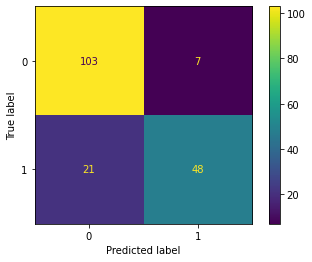

In [63]:
cm = confusion_matrix(teste_y, predicoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot();

In [64]:
original['test_error'] = original['PassengerId'].isin(resultado.query('Correct == False')['PassengerId'])
test_error = original.query('test_error == True')
test_error

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test_error
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,True
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,True
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S,True
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,True
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,True
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,True
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,True
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S,True
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,True
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,True


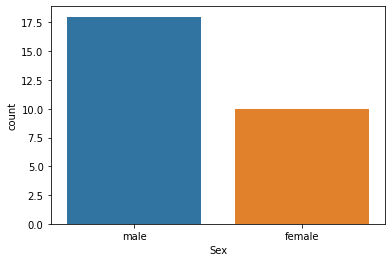

In [65]:
sns.countplot(x='Sex', data=test_error);

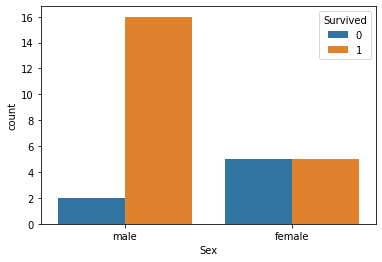

In [35]:
sns.countplot(x='Sex', data=test_error, hue='Survived');

O erro parece se concentrar em mulheres que morreram e homens que sobreviveram, ainda que no caso das mulheres a distribuição seja mais homogênea.

**Hipótese para modelo**

1. Treinamento do melhor modelo com todos os dados.
2. Utilizar o mesmo modelo para classificar apenas os homens.
3. Utilizar o mesmo modelo para classificar apenas as mulheres.
4. Sempre que no modelo geral um homem morrer e no específico sobreviver, pegar a sobrevivência.
5. Sempre que no modelo geral uma mulher sobreviver e no específico morrer, pegar a morte.

In [40]:
treino_x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Relateds', 'possui_cabine',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'PassengerId'],
      dtype='object')

In [101]:
class TitanicCombinedClassificator:
    def __init__(self, params):
        self.params = params
        self.main_model = RandomForestClassifier(**self.params)
        self.f_model = RandomForestClassifier(**self.params)
        self.m_model = RandomForestClassifier(**self.params)

    def fit(self, x, y):        
        x['y'] = y
        self.main_model.fit(x.drop(columns=['y']), y)
        full_f = x.query('Sex_female == 1')
        full_m = x.query('Sex_male == 1')
        fx = full_f.drop(columns=['y'])
        fy = full_f['y']
        mx = full_m.drop(columns=['y'])
        my = full_m['y']
        self.f_model.fit(fx, fy)
        self.m_model.fit(mx, my)
        return self

    def predict(self, x):
        x = x.reset_index()
        fx = x.query('Sex_female == 1')
        mx = x.query('Sex_male == 1')

        main_result = pd.DataFrame()
        main_result['index'] = x['index']
        main_result['main_predictions'] = self.main_model.predict(x.drop(columns=['index']))

        male_result = pd.DataFrame()
        male_result['index'] = mx['index']
        male_result['male_predictions'] = self.m_model.predict(mx.drop(columns=['index']))

        female_result = pd.DataFrame()
        female_result['index'] = fx['index']
        female_result['female_predictions'] = self.f_model.predict(fx.drop(columns=['index']))

        full_result = pd.merge(x, pd.merge(pd.merge(main_result, male_result, on='index', how='outer'), female_result, on='index', how='outer'), on='index', how='outer')
        predictions = []
        for i, r in full_result.reset_index().iterrows():
            if(r['Sex_female'] == 1 and r['female_predictions'] == 0):
                predictions.append(0)
            elif(r['Sex_male'] == 1 and r['male_predictions'] == 1):
                predictions.append(1)
            else:
                predictions.append(int(r['main_predictions']))

        return predictions

    def score(self, x, y_true):
        predictions = self.predict(x)
        return {
            'accuracy_score': accuracy_score(y_true, predictions),
            'recall_score': recall_score(y_true, predictions),
            'balanced_accuracy_score': balanced_accuracy_score(y_true, predictions),
            'precision_score': precision_score(y_true, predictions),
            'f1_score': f1_score(y_true, predictions)
        }

In [102]:
classificator = TitanicCombinedClassificator(best_params)
classificator.fit(treino_x, treino_y)
classificator.score(teste_x, teste_y)

{'accuracy_score': 0.8547486033519553,
 'recall_score': 0.7391304347826086,
 'balanced_accuracy_score': 0.833201581027668,
 'precision_score': 0.864406779661017,
 'f1_score': 0.796875}

O resultado geral apresentou uma melhora significativa. Como ele se comporta com os dados do Kaggle de teste?

In [109]:
def export_titanic_custom_model_submission():
    treino = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v2/train_dummies_2.csv')
    teste = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v2/test_dummies_2.csv')
    Xvalidation = teste.drop(columns=['PassengerId'])

    X = treino.drop(columns=['Survived'])
    y = treino['Survived']

    modelo = TitanicCombinedClassificator(best_params)
    modelo.fit(X, y)
    predicoes = modelo.predict(Xvalidation)
    resultado = pd.DataFrame()
    resultado['PassengerId'] = teste['PassengerId']
    resultado['Survived'] = predicoes
    resultado.to_csv('../../data/submissions/custom_model.csv', index=False)
export_titanic_custom_model_submission()

Não houve melhora nos resultados do Kaggle. Será que se eu fizer a validação apenas para o caso dos homens isso mudaria?

In [106]:
class TitanicCombinedClassificator:
    def __init__(self, params):
        self.params = params
        self.main_model = RandomForestClassifier(**self.params)
        self.f_model = RandomForestClassifier(**self.params)
        self.m_model = RandomForestClassifier(**self.params)

    def fit(self, x, y):        
        x['y'] = y
        self.main_model.fit(x.drop(columns=['y']), y)
        full_f = x.query('Sex_female == 1')
        full_m = x.query('Sex_male == 1')
        fx = full_f.drop(columns=['y'])
        fy = full_f['y']
        mx = full_m.drop(columns=['y'])
        my = full_m['y']
        self.f_model.fit(fx, fy)
        self.m_model.fit(mx, my)
        return self

    def predict(self, x):
        x = x.reset_index()
        fx = x.query('Sex_female == 1')
        mx = x.query('Sex_male == 1')

        main_result = pd.DataFrame()
        main_result['index'] = x['index']
        main_result['main_predictions'] = self.main_model.predict(x.drop(columns=['index']))

        male_result = pd.DataFrame()
        male_result['index'] = mx['index']
        male_result['male_predictions'] = self.m_model.predict(mx.drop(columns=['index']))

        female_result = pd.DataFrame()
        female_result['index'] = fx['index']
        female_result['female_predictions'] = self.f_model.predict(fx.drop(columns=['index']))

        full_result = pd.merge(x, pd.merge(pd.merge(main_result, male_result, on='index', how='outer'), female_result, on='index', how='outer'), on='index', how='outer')
        predictions = []
        for i, r in full_result.reset_index().iterrows():            
            if(r['Sex_male'] == 1 and r['male_predictions'] == 1):
                predictions.append(1)
            else:
                predictions.append(int(r['main_predictions']))

        return predictions

    def score(self, x, y_true):
        predictions = self.predict(x)
        return {
            'accuracy_score': accuracy_score(y_true, predictions),
            'recall_score': recall_score(y_true, predictions),
            'balanced_accuracy_score': balanced_accuracy_score(y_true, predictions),
            'precision_score': precision_score(y_true, predictions),
            'f1_score': f1_score(y_true, predictions)
        }

In [108]:
classificator = TitanicCombinedClassificator(best_params)
classificator.fit(treino_x, treino_y)
classificator.score(teste_x, teste_y)

{'accuracy_score': 0.8547486033519553,
 'recall_score': 0.7536231884057971,
 'balanced_accuracy_score': 0.8359025032938077,
 'precision_score': 0.8524590163934426,
 'f1_score': 0.8}

In [110]:
export_titanic_custom_model_submission()

O resultado melhorou em relação ao anterior, mas se manteve o mesmo do `RandomForest` no Kaggle. Sendo que apenas dois registros foram alterados. Com isso, é provável que a regra para mulheres não esteja sendo efetiva.

In [111]:
test_error.query('Sex == "female"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test_error
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S,True
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,True
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,True
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S,True
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,True
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q,True
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,True
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,True
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S,True
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S,True


Com os dados atuais é difícil obter um modelo customizado (algo como um `Ensamble`) para classificar os dados. Um próximo passo é tentar utilizar ensambles prontos como o `BaggingClassifier`.